In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 


In [8]:
df= pd.read_csv('customer_churn_dataset.csv')
df.head(10)


,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes
5,6,24,39.66,951.84,Two year,Cash,Fiber,No,No,1,No
6,7,3,118.95,356.85,Month-to-month,Credit,DSL,No,No,2,Yes
7,8,22,44.33,975.26,Month-to-month,Debit,Fiber,Yes,Yes,0,No
8,9,53,103.82,5502.46,Month-to-month,UPI,Fiber,Yes,Yes,1,No
9,10,2,67.03,134.06,Two year,Credit,DSL,No,Yes,2,No


In [9]:
df.isna()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().any()

customer_id         False
tenure              False
monthly_charges     False
total_charges       False
contract            False
payment_method      False
internet_service     True
tech_support        False
online_security     False
support_calls       False
churn               False
dtype: bool

In [11]:
df.isna().any().sum()

1

In [12]:
df.dropna(inplace=True)

In [13]:
df

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,Two year,Cash,DSL,No,Yes,0,Yes
19996,19997,10,59.88,598.80,Month-to-month,UPI,Fiber,Yes,No,1,No
19997,19998,6,42.96,257.76,Month-to-month,Credit,Fiber,No,No,2,No
19998,19999,7,102.85,719.95,Month-to-month,Debit,DSL,Yes,No,2,No


In [14]:
a=df.copy()

In [15]:
a.drop(['internet_service','tech_support','online_security','support_calls'],axis=1)

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,No
1,2,15,35.28,529.20,Month-to-month,Debit,No
2,3,72,78.24,5633.28,Month-to-month,Debit,No
3,4,61,80.24,4894.64,One year,Cash,No
4,5,21,39.38,826.98,Month-to-month,UPI,Yes
...,...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,Two year,Cash,Yes
19996,19997,10,59.88,598.80,Month-to-month,UPI,No
19997,19998,6,42.96,257.76,Month-to-month,Credit,No
19998,19999,7,102.85,719.95,Month-to-month,Debit,No


In [16]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17987 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17987 non-null  int64  
 1   tenure            17987 non-null  int64  
 2   monthly_charges   17987 non-null  float64
 3   total_charges     17987 non-null  float64
 4   contract          17987 non-null  object 
 5   payment_method    17987 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      17987 non-null  object 
 8   online_security   17987 non-null  object 
 9   support_calls     17987 non-null  int64  
 10  churn             17987 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.6+ MB


In [17]:
a.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,17987.000000,17987.000000,17987.000000,17987.000000,17987.000000
mean,10018.560071,36.496081,70.089566,2550.416062,1.513593
std,5776.021251,20.809721,28.911297,1890.232329,1.230687
min,1.000000,1.000000,20.000000,20.230000,0.000000
25%,5021.500000,18.000000,45.170000,1045.760000,1.000000
50%,10019.000000,37.000000,70.270000,2098.800000,1.000000
75%,15029.500000,54.500000,95.205000,3710.895000,2.000000
max,20000.000000,72.000000,120.000000,8629.920000,8.000000


In [18]:
#one hot encoding
a=pd.get_dummies(a,columns=['churn'],drop_first=True,dtype=int)

In [19]:
a.columns

Index(['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'contract',
       'payment_method', 'internet_service', 'tech_support', 'online_security',
       'support_calls', 'churn_Yes'],
      dtype='object')

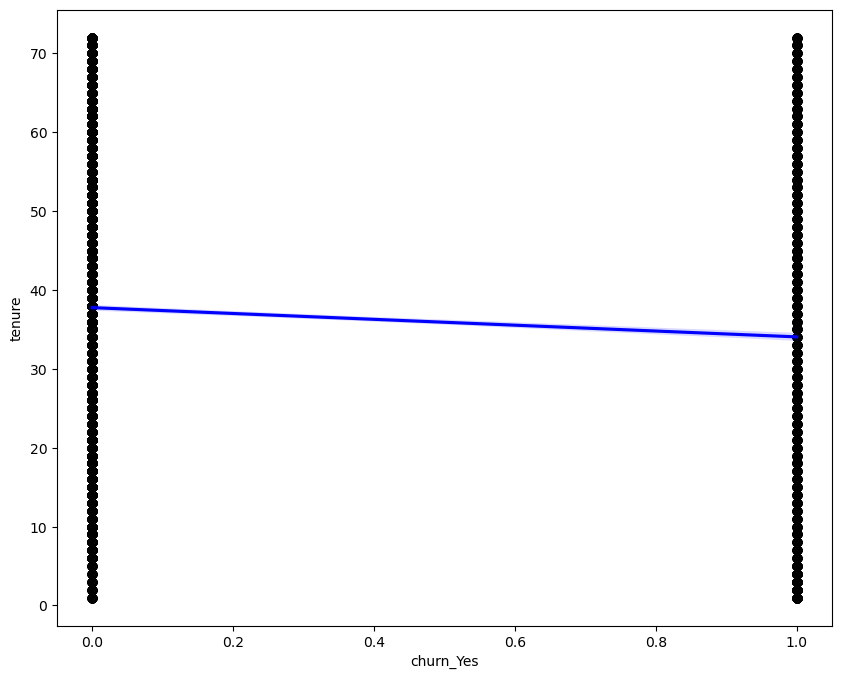

In [20]:
plt.figure(figsize=(10,8))
sns.regplot(x=a['churn_Yes'],
           y=a['tenure'],
           data=a,
           scatter_kws={'color':'k'},
           line_kws={'color':'blue'})
plt.show()

In [30]:
a.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn_Yes
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,0
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,0
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,0
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,0
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,1


In [40]:
a.shape
a.drop(['contract','payment_method','internet_service','tech_support','online_security'],axis=1)

,customer_id,tenure,monthly_charges,total_charges,support_calls,churn_Yes
0,1,52,54.20,2818.40,1,0
1,2,15,35.28,529.20,2,0
2,3,72,78.24,5633.28,0,0
3,4,61,80.24,4894.64,0,0
4,5,21,39.38,826.98,4,1
...,...,...,...,...,...,...
19995,19996,36,69.51,2502.36,0,1
19996,19997,10,59.88,598.80,1,0
19997,19998,6,42.96,257.76,2,0
19998,19999,7,102.85,719.95,2,0


In [ ]:
DATA='customer_churn_dataset.csv'

In [ ]:
sns.histplot(data=DATA,kde=True)
